# Exercise 9: Home Range Analysis
## Geographic Information Systems 1 Lab
### GEOG 3150

#### To begin this exercise, please make a copy of the _colab notebook_ by going to **_File > Save a copy in Drive_**. As in other exercises, be sure you are connected and you use _Runtime > Run all_ prior to working on the exercise to ensure all of the scripts are run. To answer questions or edit the scripts you can double click in the text/code blocks or create a new text/code block of your own. When you have completed the exercise you can share your answers with me by using the **Share** button at the top of the page, adjusting the restrictions to "change to anyone with the link", then copying the link and emailing it to me.

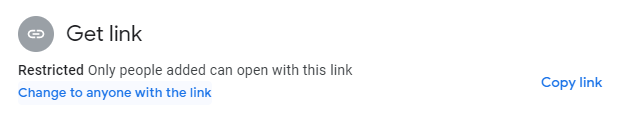

# Step One: The Data
Adding and loading *adehabitat, tidyverse, OpenStreetMaps, ggfortify, maptools, and rgeos.* 

In [ ]:
packages<-c("adehabitatHR","ggfortify","OpenStreetMap","tidyverse","maptools","rgeos")
sapply(packages, install.packages, character.only=TRUE)
sapply(packages, require, character.only=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘filehash’, ‘CircStats’, ‘sp’, ‘deldir’, ‘ade4’, ‘adehabitatMA’, ‘adehabitatLT’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘raster’, ‘rgdal’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$adehabitatHR
NULL

$ggfortify
NULL

$OpenStreetMap
NULL

$tidyverse
NULL

$maptools
NULL

$rgeos
NULL

Loading required package: adehabitatHR

Loading required package: sp

Loading required package: deldir

deldir 0.2-10      Nickname: "Morpheus and Euripides"


     Note 1: As of version 0.2-1, error handling in this 
     package was amended to conform to the usual R protocol. 
     The deldir() function now actually throws an error 
     when one occurs, rather than displaying an error number 
     and returning a NULL.
 
     Note 2:  As of version 0.1-29 the arguments "col" 
     and "lty" of plot.deldir() had their names changed to 
     "cmpnt_col" and "cmpnt_lty" respectively basically 
     to allow "col" and and "lty" to be passed as "..." 
     arguments.
 
     Note 3: As of version 0.1-29 the "plotit" argument 
     of deldir() was changed to (simply) "plot".
 
     See the help for deldir() and plot.deldir().


Loading required package: ade4

Loading required package: adehabitatMA

Registered S3 methods overwritten by 'adehabitatMA':
  method                       from
  p

adehabitatHR     ggfortify OpenStreetMap     tidyverse      maptools 
         TRUE          TRUE          TRUE          TRUE          TRUE 
        rgeos 
         TRUE

#Step One: The Data
Loading the data.

In [ ]:
cougars <- read.csv("https://raw.githubusercontent.com/chrismgentry/GIS1ex9/main/cougars.csv")
head(cougars)

,timestamp,long,lat,individual,tag_ident,ind_ident,study_name,utm_east,utm_north,utm_zone,study_tz,study_ts,date,count
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,2014-02-12 20:23:49,-111.9422,38.56004,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",417905.6,4268377,12N,Mountain Standard Time,2014-02-12 13:23:49,3/29/2021,1
2,2014-02-12 23:01:36,-111.9423,38.56000,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",417902.2,4268371,12N,Mountain Standard Time,2014-02-12 16:01:36,3/29/2021,1
3,2014-02-13 03:01:53,-111.9417,38.56018,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",417949.3,4268392,12N,Mountain Standard Time,2014-02-12 20:01:53,3/29/2021,1
4,2014-02-13 07:02:29,-111.9406,38.55744,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",418044.6,4268086,12N,Mountain Standard Time,2014-02-13 00:02:29,3/29/2021,1
5,2014-02-13 11:01:26,-111.9346,38.55863,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",418572.4,4268213,12N,Mountain Standard Time,2014-02-13 04:01:26,3/29/2021,1
6,2014-02-13 23:01:20,-111.9404,38.56648,Puma concolor,F64,F64,"Site fidelity in cougars and coyotes, Utah/Idaho USA (data from Mahoney et al. 2016)",418070.8,4269090,12N,Mountain Standard Time,2014-02-13 16:01:20,3/29/2021,1


# Step One: The Data
Viewing the distribution.

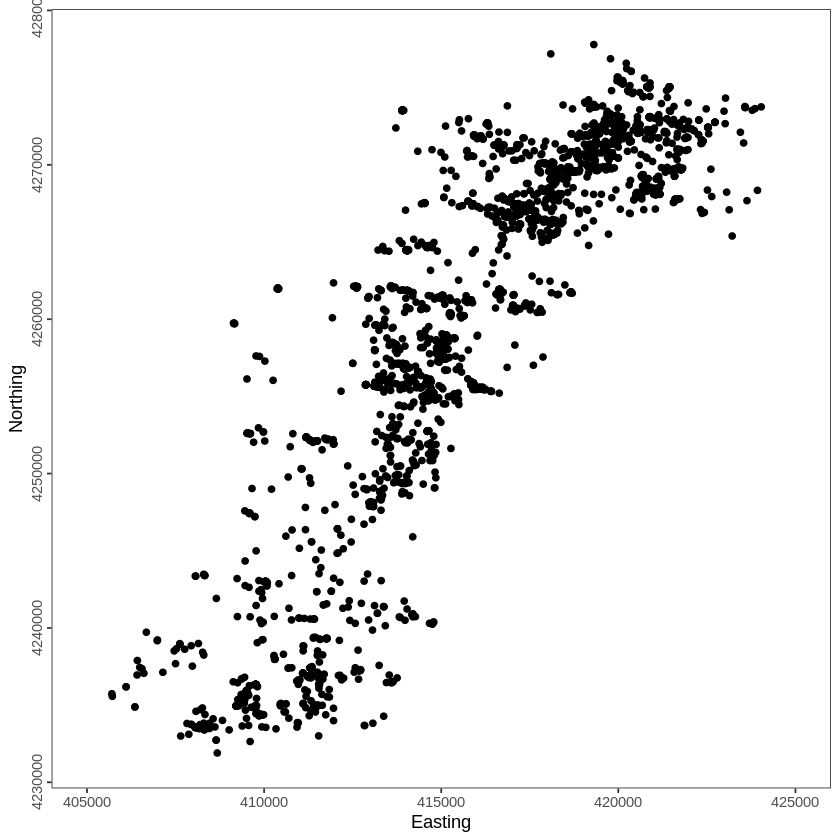

In [ ]:
ggplot(cougars) + geom_point(aes(utm_east, utm_north)) + 
                  labs(x="Easting", y="Northing") +
                  guides(color=guide_legend("Identification")) +
                  theme_bw() + theme(legend.position = "top") +
                  theme(axis.text.y = element_text(angle=90, hjust=0.5)) +
                  theme(panel.grid.major = element_blank(),
                        panel.grid.minor = element_blank()) +
                  xlim(405000,425000)

## **Question No. 1**: How many individuals are being tracked in this dataset?
### _Answer:_

# Step Two: The Analyses
Creating the _SpatialPoints_ data.

In [ ]:
x <- cougars$utm_east
y <- cougars$utm_north
xy <- as.data.frame(cbind(x,y))
coordinates(xy) <- ~x+y

# Step Two: The Analyses
Creating the minimum convex polygon

In [ ]:
mcp.out <- mcp(xy, percent=100, unout="ha")
mcp.poly <- fortify(mcp.out)

Regions defined for each Polygons



# Step Two: The Analyses
Creating the kernel density estimates

In [ ]:
kde <- kernelUD(xy, h=2000, kern="epa", grid=100)
kde100 <- getverticeshr(kde, 100, unout="ha")
kde75 <- getverticeshr(kde, 75, unout="ha")
kde50 <- getverticeshr(kde, 50, unout="ha")
kde25 <- getverticeshr(kde, 25, unout="ha")
kde.poly100 <- fortify(kde100)
kde.poly75 <- fortify(kde75)
kde.poly50 <- fortify(kde50)
kde.poly25 <- fortify(kde25)

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



## **Question No. 2**: What is the area of the Minimum Convex Polygon? What is the area of the Kernel Density Estimation?
### _Answer_:

# Step Three: The Visualization
Getting the imagery

In [ ]:
imagery <- openmap(c(max(cougars$lat+0.05),min(cougars$long-0.05)),
                   c(min(cougars$lat-0.07),max(cougars$long+0.05)),
                   type = "bing")

# Step Three: The Visualization
Reprojecting the imagery

In [ ]:
imagery_utm <- openproj(imagery, 
               projection = "+proj=utm +zone=12 +datum=WGS84 +units=m +no_defs")

# Step Three: The Visualization
Creating the plot

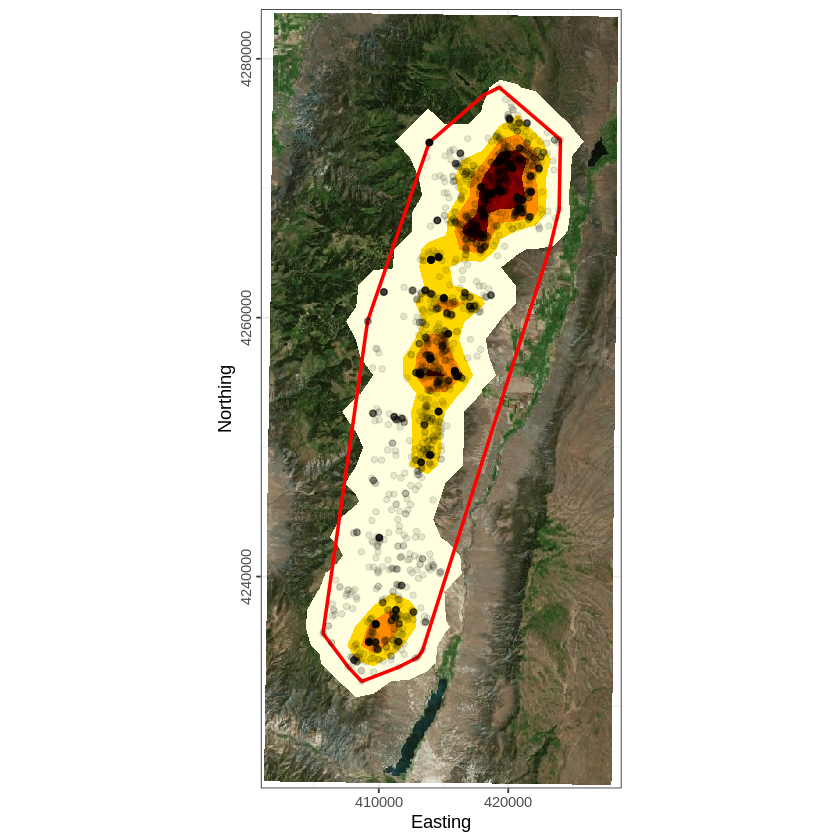

In [ ]:
autoplot.OpenStreetMap(imagery_utm, expand = TRUE) + 
theme_bw() + theme(legend.position = "bottom") +
geom_polygon(data = kde.poly100, aes(x=long, y=lat, group=group), color = NA, fill = 'lightyellow') +
geom_polygon(data = kde.poly75, aes(x=long, y=lat, group=group), color = NA, fill = 'gold') +
geom_polygon(data = kde.poly50, aes(x=long, y=lat, group=group), color = NA, fill = 'darkorange') +
geom_polygon(data = kde.poly25, aes(x=long, y=lat, group=group), color = NA, fill = 'darkred') +
geom_polygon(data = mcp.poly, aes(x=long, y=lat), color = "red", fill = NA, alpha = 0.8, size = 1) +
geom_point(data = cougars, aes(x=utm_east, y=utm_north), alpha = 0.1) +
labs(x="Easting", y="Northing") +
theme(legend.position="bottom") +
theme(axis.text.y = element_text(angle=90, hjust=0.5))

## **Question No. 3**: What steps would you take to differentiate between the individual cougars in this visualization? 
### _Answer:_

# Step Four: The Proposal
Adding the proposed "Grass Valley Trail" data

In [ ]:
trail <- read.csv('https://raw.githubusercontent.com/chrismgentry/GIS1ex9/main/hiking_trail.csv')

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons

Regions defined for each Polygons



Step Four: The Proposal - Adding the trail
For this step you will need to add the following to the visualization script from above:

> geom_path(data = trail, aes(x = x ,y = y), size = 1, linetype = 1)

Add your completed script to the empty code block below.

## **Question No. 4**: Does the trail cross any areas calculated as _high_ or _very high_ use based on the _KDE_ analysis?
### _Answer:_

# The Decision
Recall that Grass Valley Trail Committee has asked you to assess the impact of the proposed hiking trail on the mountain lion habitat and potential risk to visitors. Based on the analyses above, complete a lab write-up that addresses the following questions:

- Explain to the committee the process you used to determine the risks of the proposed trail.
- Describe the difference between the two types of home range analyses. How would this potentially impact the decisions made by the committee?
- What portion of the proposed trail has the highest likelihood to traverse areas of the Sevier Plateau that are frequently (high to very high categories) used by the tracked cougars?

Finally, provide a recommendation for the committee on how the proposed trail can be completed with as little interaction as possible with the cougar habitat. Include a visualization (whether digital or analog) that helps provide additional details for your recommendation. Record your answer in the text box below.

### _Answer:_